In [1]:
import numpy as np
import sys
import os
import tkinter
import glob
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

def plot_spec(plotDict, image_num):
    time_step = 1000
    Slen = 128
    image_num = 2
    time_duration = 1 
    start_point = 12800
    line_count = 0


    for time in range(0,time_duration):
#             fig_name = 'downsample_notnormal_plot/' + filename + '/' + str(time+1) + '00ms.png'
            fig, axes = plt.subplots(image_num, 1, sharex=True, sharey=True)
#             plt.yticks([0,128],['0','5'])
#             plt.xticks([0,200,400,600,800,1000], [0,51.2,102.4,153.6,204.8,256])

            for index in range(0,image_num):
                    data = []
                    fid = open(plotDict[index][0] + '.txt','r')
                    for i in range(0,start_point):
                        fid.readline()
                    for i in range(0,time_step):
                            line = fid.readline()
                            line_count += 1
                            amplitude = line.split()
                            current_data = [float(i) for i in amplitude]
                            data += current_data

                    data_array = np.array(data).reshape((time_step,Slen)).T
                    im = axes[index].imshow(data_array,cmap='jet',vmin=-70,vmax=-20,aspect='auto')
                    axes[index].set_title(plotDict[index][1])
                    axes[index].tick_params(direction="in")
                    axes[index].set_yticks([0,128])
            axes[image_num-1].set_xlabel('Time(ms)',size=16)
#             axes[1].set_ylabel('Frequncy (MHz)', size=16)
#             ax2_v = axes[1].twinx()
#             ax2_v.yaxis.set_label_position("right")
#             ax2_v.set_ylabel('FFT Amp. (dBm)', size=16, labelpad = 60)
#             plt.setp(ax2_v.get_yticklabels(), visible=False)
            fig.text(0.04, 0.5, 'Frequncy (MHz)', va='center', rotation='vertical', size=16)
            fig.text(0.9, 0.5, 'FFT Amp. (dBm)', va='center', rotation='vertical', size=16)
            
            xtick = [i*5 for i in [0,40,80,120,160,200]]
            plt.setp(axes, xticks=xtick, xticklabels=[int(i*0.25) for i in xtick],
                     yticks=[0,128], yticklabels=['0','5'])
#             plt.subplots_adjust(hspace=0.7)
            fig.colorbar(im, ax=axes.ravel().tolist())
            fig.savefig('spec.eps', bbox_inches = 'tight', format='eps')
            plt.show()
            plt.close(fig)

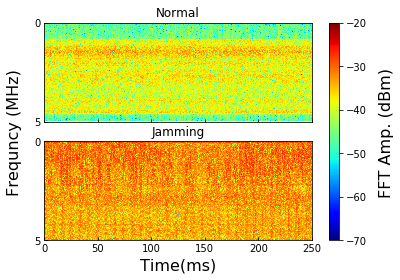

In [3]:
PlotDict = [['/net/adv_spectrum/data/downsample/downsample_10/normal/ryerson_ab_train/1518561613_880M_5m_ap','Normal'], 
            ['/net/adv_spectrum/data/downsample/downsample_10/abnormal/ryerson_ab_train_fsk_1.4G/1518586722_1584941119_915M_5m_ap', 'Jamming']]

plot_spec(PlotDict, 2)